In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Set styling
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [2]:
df = pd.read_csv('Datasets/Life Expectancy Data.csv')

## EXPLORATORY DATA ANALYSIS (EDA)

In [7]:
df.shape

(2938, 22)

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', 'BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [16]:
print(f"\nCategorical Features: {df.select_dtypes(include='object').columns.tolist()}")
print(f"Numerical Features: {df.select_dtypes(include=[np.number]).columns.tolist()}")


Categorical Features: ['Country', 'Status']
Numerical Features: ['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', 'BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


## MISSING VALUE ANALYSIS

In [17]:
df.isnull().mean()*100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
BMI                                 1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [28]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.3 and df[var].isnull().mean() > 0]

In [29]:
cols

['Life expectancy ',
 'Adult Mortality',
 'Alcohol',
 'Hepatitis B',
 'BMI ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [30]:
df[cols].sample(5)

,Life expectancy,Adult Mortality,Alcohol,Hepatitis B,BMI,Polio,Total expenditure,Diphtheria,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1224,73.3,122.0,0.03,99.0,52.5,99.0,7.63,99.0,NaN,NaN,7.7,7.9,0.728,12.8
1267,82.2,6.0,2.62,97.0,64.6,95.0,7.81,95.0,37582.84624,82157.0,1.2,1.1,0.895,16.0
987,73.9,126.0,6.18,84.0,49.2,89.0,8.39,88.0,1872.68416,4136.0,2.7,2.9,0.714,12.6
1833,81.1,63.0,8.96,2.0,59.9,97.0,1.53,97.0,5354.65360,1669374.0,1.0,0.9,0.911,17.2
731,54.3,314.0,1.43,NaN,16.9,6.0,3.14,6.0,NaN,NaN,11.5,11.3,NaN,NaN


In [31]:
new_df = df[cols].dropna()

In [33]:
# for col in cols:
#     plt.figure(figsize=(8, 6))
#     sns.histplot(new_df[col], kde=True)  # kde=True adds a Kernel Density Estimate curve
#     plt.title(f'Histogram for {col}')
#     plt.show()

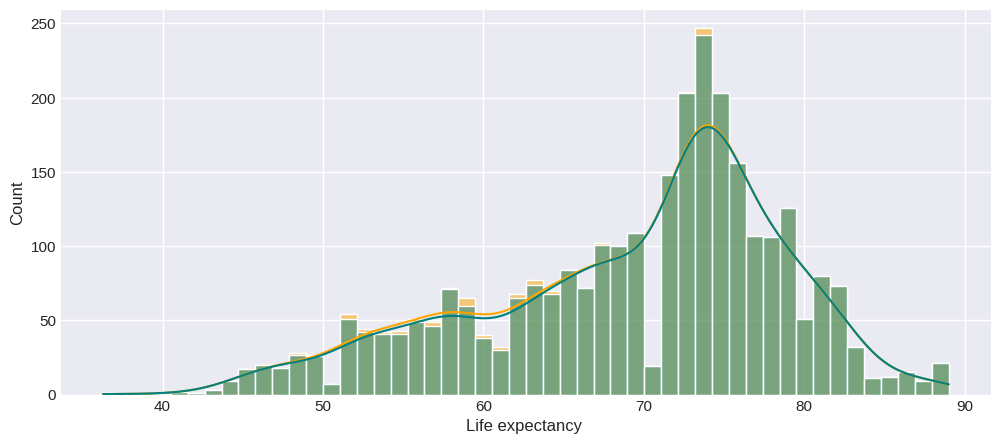

In [27]:
fig, ax = plt.subplots(ncols=1, figsize=(12, 5))

sns.histplot(df['Life expectancy '], bins=50, ax=ax, kde=True, color='orange')

sns.histplot(new_df['Life expectancy '], bins=50, ax=ax, kde=True, color='teal')

plt.show()

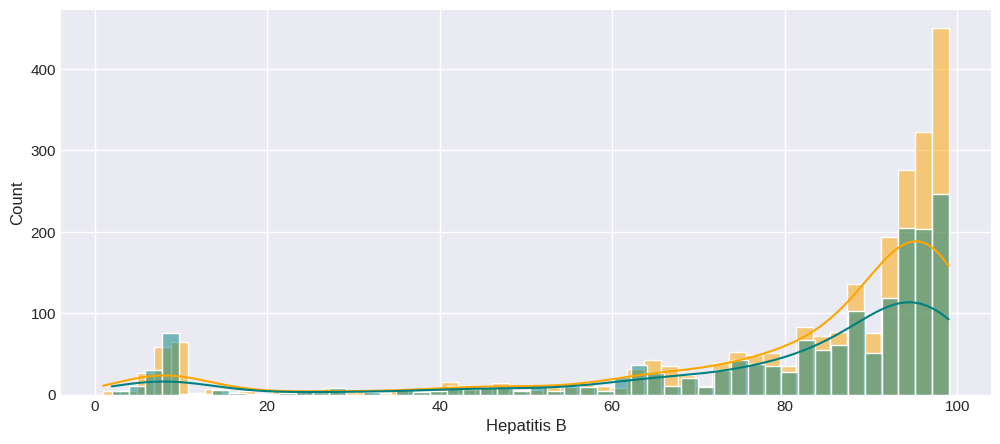

In [34]:
fig, ax = plt.subplots(ncols=1, figsize=(12, 5))

sns.histplot(df['Hepatitis B'], bins=50, ax=ax, kde=True, color='orange')

sns.histplot(new_df['Hepatitis B'], bins=50, ax=ax, kde=True, color='teal')

plt.show()

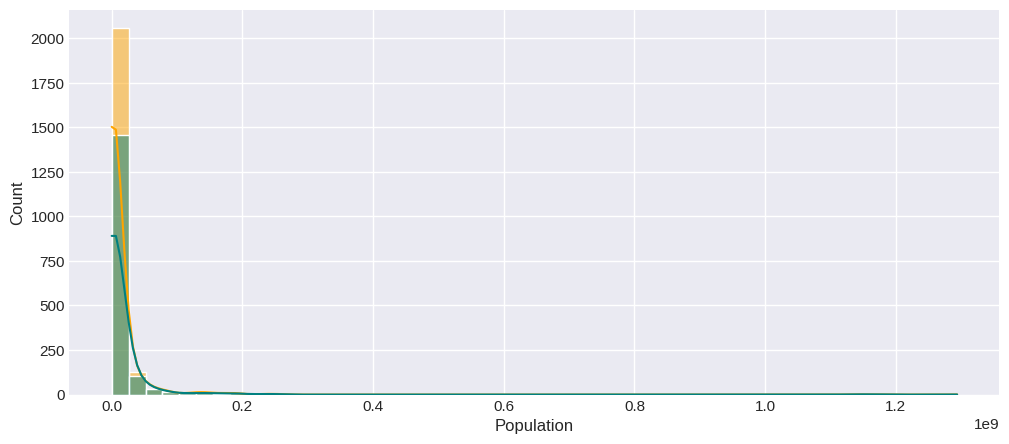

In [35]:
fig, ax = plt.subplots(ncols=1, figsize=(12, 5))

sns.histplot(df['Population'], bins=50, ax=ax, kde=True, color='orange')

sns.histplot(new_df['Population'], bins=50, ax=ax, kde=True, color='teal')

plt.show()

In [39]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['Population'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['Population'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp.sample(5)

,original,cca
Population,,
1421597.0,0.00034,NaN
3772938.0,0.00034,0.000606
5547683.0,0.00034,NaN
7885689.0,0.00034,NaN
27949944.0,0.00034,0.000606


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [41]:
X = df.drop(columns=['Life expectancy '])
y = df['Life expectancy ']

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
X_train.shape, X_test.shape

((2350, 21), (588, 21))

In [44]:
df.isnull().mean()

Country                            0.000000
Year                               0.000000
Status                             0.000000
Life expectancy                    0.003404
Adult Mortality                    0.003404
infant deaths                      0.000000
Alcohol                            0.066031
percentage expenditure             0.000000
Hepatitis B                        0.188223
Measles                            0.000000
BMI                                0.011572
under-five deaths                  0.000000
Polio                              0.006467
Total expenditure                  0.076923
Diphtheria                         0.006467
 HIV/AIDS                          0.000000
GDP                                0.152485
Population                         0.221920
 thinness  1-19 years              0.011572
 thinness 5-9 years                0.011572
Income composition of resources    0.056841
Schooling                          0.055480
dtype: float64

In [46]:
mean_Hepatitis_B = X_train['Hepatitis B'].mean()
median_Hepatitis_B = X_train['Hepatitis B'].median()

mean_GDP = X_train['GDP'].mean()
median_GDP = X_train['GDP'].median()

mean_Population = X_train['Population'].mean()
median_Population = X_train['Population'].median()

In [47]:
X_train['Hepatitis_B_median'] = X_train['Hepatitis B'].fillna(median_Hepatitis_B)
X_train['Hepatitis_B_mean'] = X_train['Hepatitis B'].fillna(mean_Hepatitis_B)

X_train['GDP_median'] = X_train['GDP'].fillna(median_GDP)
X_train['GDP_mean'] = X_train['GDP'].fillna(mean_GDP)

X_train['Population_median'] = X_train['Population'].fillna(median_Population)
X_train['Population_mean'] = X_train['Population'].fillna(mean_Population)

In [48]:
X_train.sample(5)

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Hepatitis_B_median,Hepatitis_B_mean,GDP_median,GDP_mean,Population_median,Population_mean
1486,Lesotho,2003,Developing,648.0,5,1.99,5.300902,17.0,1,26.4,...,1.2,1.1,0.440,10.5,17.0,17.000000,63.636279,63.636279,191897.0,191897.0
2520,Sweden,2000,Developed,73.0,0,6.20,3689.727300,NaN,59,52.8,...,1.4,1.3,0.873,15.9,92.0,81.141811,29283.550000,29283.550000,887219.0,887219.0
1105,Guinea-Bissau,2000,Developing,3.0,5,2.84,6.699419,NaN,0,17.4,...,1.2,1.2,0.000,6.4,92.0,81.141811,297.751944,297.751944,1243229.0,1243229.0
2283,Seychelles,2013,Developing,172.0,0,0.01,1521.672751,99.0,0,35.5,...,5.7,6.1,0.762,13.5,99.0,99.000000,15687.347950,15687.347950,89949.0,89949.0
1390,Kiribati,2003,Developing,215.0,0,0.50,1.765413,73.0,0,7.6,...,0.2,0.2,0.000,11.6,73.0,73.000000,115.386500,115.386500,88895.0,88895.0


In [49]:
print('Original Age variable variance: ', X_train['Hepatitis B'].var())
print('Age Variance after median imputation: ', X_train['Hepatitis_B_median'].var())
print('Age Variance after mean imputation: ', X_train['Hepatitis_B_mean'].var())

Original Age variable variance:  616.0945389190715
Age Variance after median imputation:  518.8718241352143
Age Variance after mean imputation:  500.95383964896865


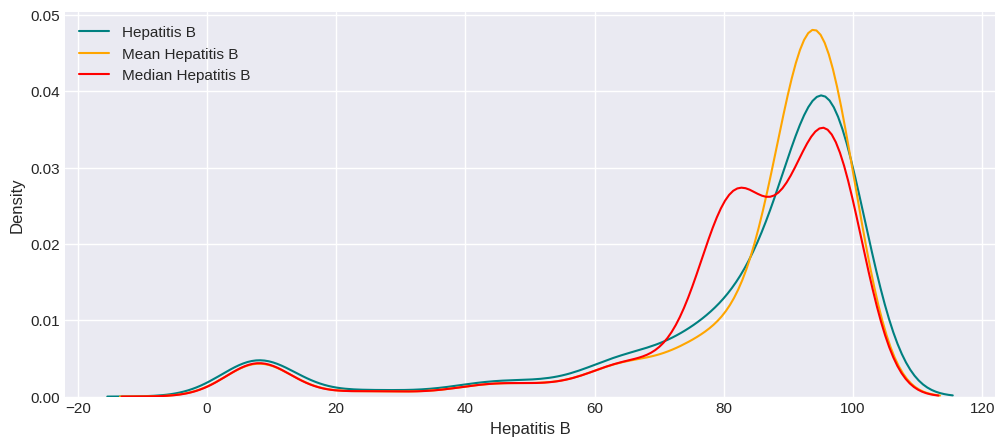

In [50]:
fig, ax = plt.subplots(ncols=1, figsize=(12, 5))

sns.kdeplot(X_train['Hepatitis B'], ax=ax, color='teal', label='Hepatitis B')
sns.kdeplot(X_train['Hepatitis_B_median'], ax=ax, color='orange', label='Mean Hepatitis B')
sns.kdeplot(X_train['Hepatitis_B_mean'], ax=ax, color='red', label='Median Hepatitis B')

# Add the legend
ax.legend()

plt.show()

In [77]:
X_train["Hepatitis_B_median_log"] = np.log1p(X_train["Hepatitis_B_median"])

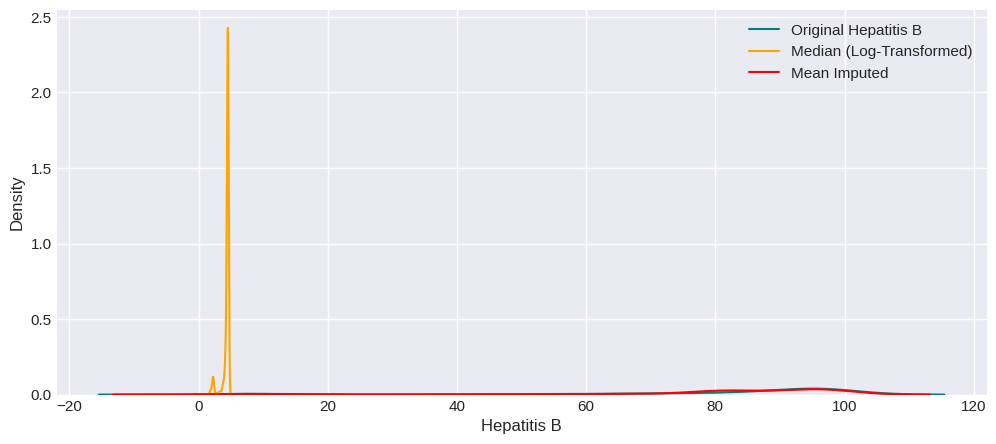

In [78]:
fig, ax = plt.subplots(ncols=1, figsize=(12, 5))

sns.kdeplot(X_train['Hepatitis B'], ax=ax, color='teal', label='Original Hepatitis B')
sns.kdeplot(X_train['Hepatitis_B_median_log'], ax=ax, color='orange', label='Median (Log-Transformed)')
sns.kdeplot(X_train['Hepatitis_B_mean'], ax=ax, color='red', label='Mean Imputed')

ax.legend()
plt.show()


In [53]:
X_train.select_dtypes('number').corr()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Hepatitis_B_median,Hepatitis_B_mean,GDP_median,GDP_mean,Population_median,Population_mean
Year,1.000000,-0.080425,-0.030257,-0.058588,0.033890,0.096514,-0.072859,0.110570,-0.036595,0.088627,...,-0.040308,-0.044307,0.241107,0.214288,0.017486,0.082904,0.097685,0.099020,0.022567,0.023413
Adult Mortality,-0.080425,1.000000,0.088430,-0.189537,-0.243701,-0.152717,0.031429,-0.389825,0.103008,-0.275146,...,0.307174,0.319448,-0.458694,-0.453581,-0.115652,-0.130605,-0.280733,-0.275809,-0.004994,-0.012517
infant deaths,-0.030257,0.088430,1.000000,-0.113263,-0.085166,-0.202093,0.491278,-0.229681,0.996285,-0.184349,...,0.467868,0.475784,-0.155359,-0.196522,-0.146114,-0.158996,-0.102146,-0.105041,0.486159,0.483169
Alcohol,-0.058588,-0.189537,-0.113263,1.000000,0.328016,0.087985,-0.041048,0.332747,-0.109775,0.217366,...,-0.427594,-0.415012,0.455713,0.544763,0.096622,0.078102,0.299420,0.305265,-0.019723,-0.024072
percentage expenditure,0.033890,-0.243701,-0.085166,0.328016,1.000000,0.018764,-0.050703,0.232362,-0.087320,0.138091,...,-0.245258,-0.247959,0.375933,0.385527,0.042731,0.013116,0.895065,0.882084,-0.014086,-0.021509
Hepatitis B,0.096514,-0.152717,-0.202093,0.087985,0.018764,1.000000,-0.107051,0.136037,-0.211387,0.482746,...,-0.112916,-0.121219,0.183975,0.216575,1.000000,1.000000,0.084118,0.086791,-0.096471,-0.086219
Measles,-0.072859,0.031429,0.491278,-0.041048,-0.050703,-0.107051,1.000000,-0.168902,0.503074,-0.148305,...,0.223594,0.221834,-0.141752,-0.134730,-0.056426,-0.075274,-0.063190,-0.059686,0.222410,0.222572
BMI,0.110570,-0.389825,-0.229681,0.332747,0.232362,0.136037,-0.168902,1.000000,-0.240066,0.284119,...,-0.535282,-0.543514,0.509778,0.550456,0.101068,0.122660,0.277517,0.276274,-0.058625,-0.054215
under-five deaths,-0.036595,0.103008,0.996285,-0.109775,-0.087320,-0.211387,0.503074,-0.240066,1.000000,-0.202212,...,0.468509,0.476498,-0.174043,-0.212069,-0.149025,-0.164414,-0.105328,-0.108485,0.470513,0.467257
Polio,0.088627,-0.275146,-0.184349,0.217366,0.138091,0.482746,-0.148305,0.284119,-0.202212,1.000000,...,-0.224439,-0.227929,0.370135,0.404706,0.364594,0.407232,0.184278,0.186969,-0.042438,-0.032322


In [54]:
X_train.select_dtypes('number').cov()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Hepatitis_B_median,Hepatitis_B_mean,GDP_median,GDP_mean,Population_median,Population_mean
Year,2.127041e+01,-4.643411e+01,-1.560613e+01,-1.024226e+00,3.051905e+02,1.052470e+01,-3.894419e+03,1.023465e+01,-2.581239e+01,9.546451e+00,...,-8.184603e-01,-9.158792e-01,0.230575,3.304734e+00,1.836961e+00,8.557756e+00,5.972148e+03,5.985476e+03,5.058985e+06,5.227501e+06
Adult Mortality,-4.643411e+01,1.569347e+04,1.240884e+03,-9.677421e+01,-5.970290e+04,-4.502002e+02,4.570545e+04,-9.731849e+02,1.976698e+03,-8.046727e+02,...,1.690214e+02,1.789440e+02,-11.829714,-1.881370e+02,-3.296343e+02,-3.657165e+02,-4.668806e+05,-4.535453e+05,-3.045734e+07,-7.603817e+07
infant deaths,-1.560613e+01,1.240884e+03,1.250729e+04,-5.177472e+01,-1.859803e+04,-4.894585e+02,6.367628e+05,-5.184650e+02,1.704061e+04,-4.830811e+02,...,2.316827e+02,2.398457e+02,-3.665985,-7.473675e+01,-3.722245e+02,-3.979845e+02,-1.514324e+05,-1.539677e+05,2.642758e+09,2.615966e+09
Alcohol,-1.024226e+00,-9.677421e+01,-5.177472e+01,1.627984e+01,2.662829e+03,8.688410e+00,-1.951929e+03,2.684301e+01,-6.879684e+01,2.042580e+01,...,-7.618864e+00,-7.528283e+00,0.376644,7.130482e+00,8.866985e+00,7.037664e+00,1.621475e+04,1.634893e+04,-3.963424e+06,-4.818071e+06
percentage expenditure,3.051905e+02,-5.970290e+04,-1.859803e+04,2.662829e+03,3.812711e+06,7.049822e+02,-1.147410e+06,9.154308e+03,-2.607670e+04,6.316348e+03,...,-2.119620e+03,-2.181561e+03,156.177681,2.581288e+03,1.900582e+03,5.732295e+02,2.316796e+07,2.257432e+07,-1.336874e+09,-2.033197e+09
Hepatitis B,1.052470e+01,-4.502002e+02,-4.894585e+02,8.688410e+00,7.049822e+02,6.160945e+02,-2.401396e+04,6.737759e+01,-6.921602e+02,2.611119e+02,...,-1.191909e+01,-1.289446e+01,0.830171,1.524318e+01,6.160945e+02,6.160945e+02,2.431950e+04,2.483392e+04,-1.274901e+08,-1.134280e+08
Measles,-3.894419e+03,4.570545e+04,6.367628e+05,-1.951929e+03,-1.147410e+06,-2.401396e+04,1.343193e+08,-3.951043e+04,8.917040e+05,-4.027234e+04,...,1.147395e+04,1.158866e+04,-306.992463,-4.702485e+03,-1.489618e+04,-1.952604e+04,-9.708119e+06,-9.066299e+06,1.252915e+11,1.248793e+11
BMI,1.023465e+01,-9.731849e+02,-5.184650e+02,2.684301e+01,9.154308e+03,6.737759e+01,-3.951043e+04,4.029597e+02,-7.410077e+02,1.328990e+02,...,-4.731726e+01,-4.891025e+01,2.071047,3.549729e+01,4.620488e+01,5.512746e+01,7.420849e+04,7.303826e+04,-5.750955e+07,-5.297022e+07
under-five deaths,-2.581239e+01,1.976698e+03,1.704061e+04,-6.879684e+01,-2.607670e+04,-6.921602e+02,8.917040e+05,-7.410077e+02,2.339050e+04,-7.246408e+02,...,3.172387e+02,3.284589e+02,-5.612381,-1.102145e+02,-5.191698e+02,-5.628037e+02,-2.135406e+05,-2.174586e+05,3.497749e+09,3.459608e+09
Polio,9.546451e+00,-8.046727e+02,-4.830811e+02,2.042580e+01,6.316348e+03,2.611119e+02,-4.027234e+04,1.328990e+02,-7.246408e+02,5.458450e+02,...,-2.302604e+01,-2.380645e+01,1.735987,3.030112e+01,1.945254e+02,2.135862e+02,5.721737e+04,5.740178e+04,-4.833404e+07,-3.666289e+07


In [55]:
missing_data = pd.DataFrame({
    'Feature': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2),
    'Data_Type': df.dtypes
})

In [56]:
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

In [57]:
print("\n4.1 MISSING VALUES SUMMARY")
print("-" * 80)
print(missing_data.to_string(index=False))


4.1 MISSING VALUES SUMMARY
--------------------------------------------------------------------------------
                        Feature  Missing_Count  Missing_Percentage Data_Type
                     Population            652               22.19   float64
                    Hepatitis B            553               18.82   float64
                            GDP            448               15.25   float64
              Total expenditure            226                7.69   float64
                        Alcohol            194                6.60   float64
Income composition of resources            167                5.68   float64
                      Schooling            163                5.55   float64
             thinness 5-9 years             34                1.16   float64
           thinness  1-19 years             34                1.16   float64
                           BMI              34                1.16   float64
                          Polio             

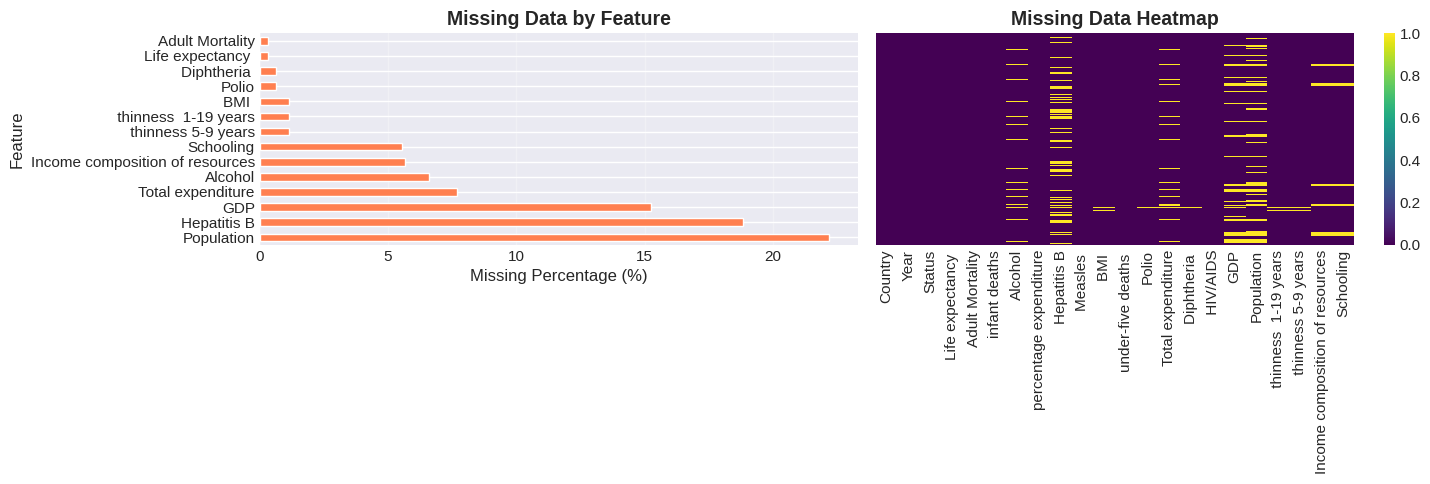

In [60]:
# Visualize missing data
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Missing data bar plot
missing_data.plot(x='Feature', y='Missing_Percentage', kind='barh', ax=axes[0], 
                   color='coral', legend=False)
axes[0].set_xlabel('Missing Percentage (%)')
axes[0].set_title('Missing Data by Feature', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Missing data heatmap
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis', ax=axes[1])
axes[1].set_title('Missing Data Heatmap', fontsize=14, fontweight='bold')

plt.tight_layout()
# plt.savefig('01_missing_data_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
# print("\n✓ Missing data visualization saved: 01_missing_data_analysis.png")
plt.close()

In [61]:
df_clean = df.copy()

In [62]:
df_clean['Population'] = df_clean.groupby('Country')['Population'].transform(
    lambda x: x.fillna(x.median())
)

In [63]:
df_clean['GDP'] = df_clean.groupby('Country')['GDP'].transform(
    lambda x: x.fillna(x.median())
)

In [65]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', 'BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [66]:
immunization_cols = ['Hepatitis B', 'Polio', 'Diphtheria ']
for col in immunization_cols:
    df_clean[col] = df_clean.groupby('Country')[col].fillna(method='ffill').fillna(method='bfill')

In [67]:
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
remaining_missing = df_clean[numeric_cols].columns[df_clean[numeric_cols].isnull().any()].tolist()

if remaining_missing:
    imputer = KNNImputer(n_neighbors=5)
    df_clean[remaining_missing] = imputer.fit_transform(df_clean[remaining_missing])

In [69]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

In [70]:
outlier_summary = []
for col in ['Life expectancy ', 'Adult Mortality', 'infant deaths', 'GDP', 'Population']:
    count, lower, upper = detect_outliers_iqr(df_clean, col)
    outlier_summary.append({
        'Feature': col,
        'Outlier_Count': count,
        'Outlier_Percentage': round(count/len(df_clean)*100, 2),
        'Lower_Bound': round(lower, 2),
        'Upper_Bound': round(upper, 2)
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df.to_string(index=False))

         Feature  Outlier_Count  Outlier_Percentage  Lower_Bound  Upper_Bound
Life expectancy              10                0.34        44.24        94.54
 Adult Mortality             82                2.79      -157.00       459.00
   infant deaths            315               10.72       -33.00        55.00
             GDP            399               13.58     -7514.49     13856.69
      Population            318               10.82 -11733272.38  20516336.62


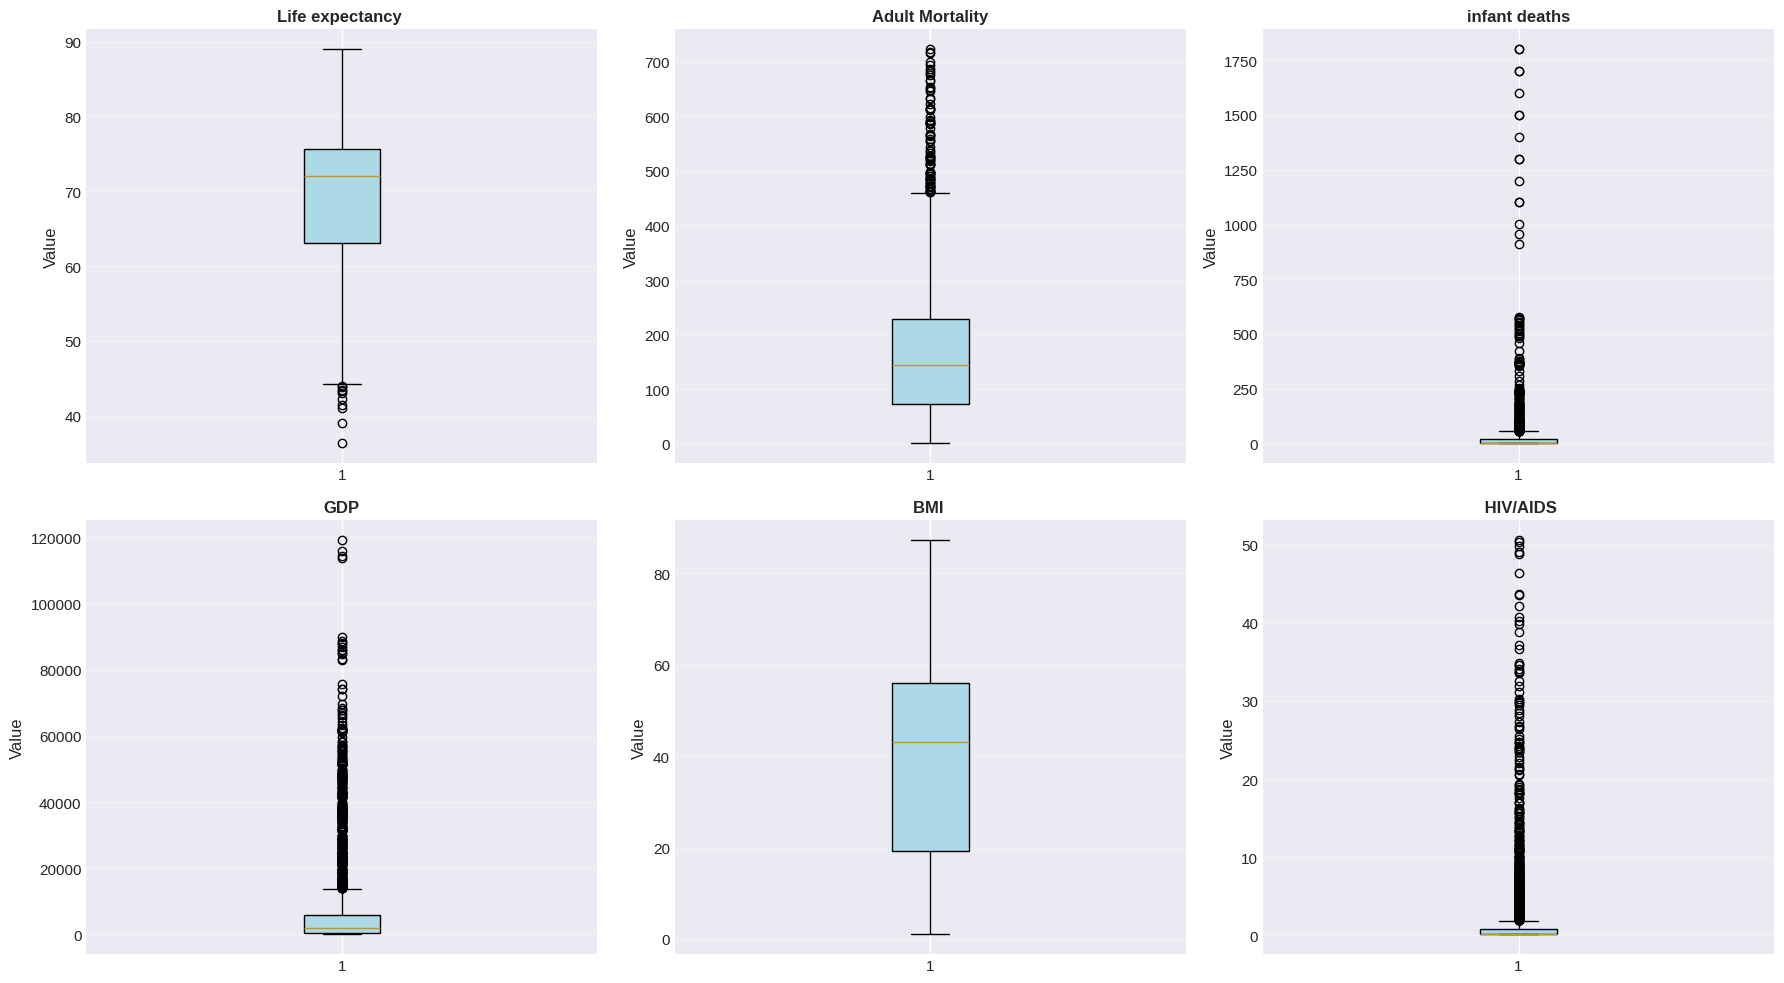

In [76]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

important_features = ['Life expectancy ', 'Adult Mortality', 'infant deaths', 
                      'GDP', 'BMI ', ' HIV/AIDS']

for idx, col in enumerate(important_features):
    axes[idx].boxplot(df_clean[col].dropna(), vert=True, patch_artist=True,
                      boxprops=dict(facecolor='lightblue'))
    axes[idx].set_title(col, fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
# plt.savefig('02_outlier_analysis.png', dpi=300, bbox_inches='tight')
# print("\n✓ Outlier visualization saved: 02_outlier_analysis.png")
plt.show()
plt.close()